In [ ]:
# Część 1

In [3]:
from sklearn import datasets

# Wczytaj przykładowy zbiór danych - dane dotyczące trzech gatunków Irysów
iris = datasets.load_iris()

# Zobaczmy jakie dane mamy w zbiorze
print('Elementy zbioru: ', list(iris.keys()))

# Zobaczmy jak wyglądają elementy zbioru
print('Typ pierwszego elementu z \'data\': ', type(iris['data'][0]))
print('Kilka pierwszych elementów:')
print(iris['data'][0:5])
print(iris['target_names'][0:5])

# Kwiaty mają swoje etykiety numeryczne...
print('Pierwszy kwiat w zbiorze to: ', iris['target'][0])

# ... a odpowiadające im nazwy są osobno
print('Pierwszy kwiat w zbiorze (słownie) to: ', iris['target_names'][0])

# Etykiety które występują
print('Cechy irysów w zbiorze to: ', iris['feature_names'])

Elementy zbioru:  ['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']
Typ pierwszego elementu z 'data':  <class 'numpy.ndarray'>
Kilka pierwszych elementów:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['setosa' 'versicolor' 'virginica']
Pierwszy kwiat w zbiorze to:  0
Pierwszy kwiat w zbiorze (słownie) to:  setosa
Cechy irysów w zbiorze to:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
# Zadanie 1: sprawdź poniżej inne elementy wczytanego zbioru danych, w szczególności opis.
print('Opis', iris['DESCR'])
print('Nazwy kwiatow', iris['target_names'])
print('Pliku z danymi', iris['filename'])
# Opisz w max 3 zdaniach swoimi słowami co zawiera zbiór danych
# Zbiór danych zawiera dane dotyczące kwiatów. 
# Element 'data' zawiera dane, których definicję znaleźć można w 'feature_names', wartości w 'data' są przypisane do konkretnych gatunków w zbiorze 'target', którego elementy odpnoszą się do konkretnych nazw gatunków w 'target_names'.


Opis .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ======

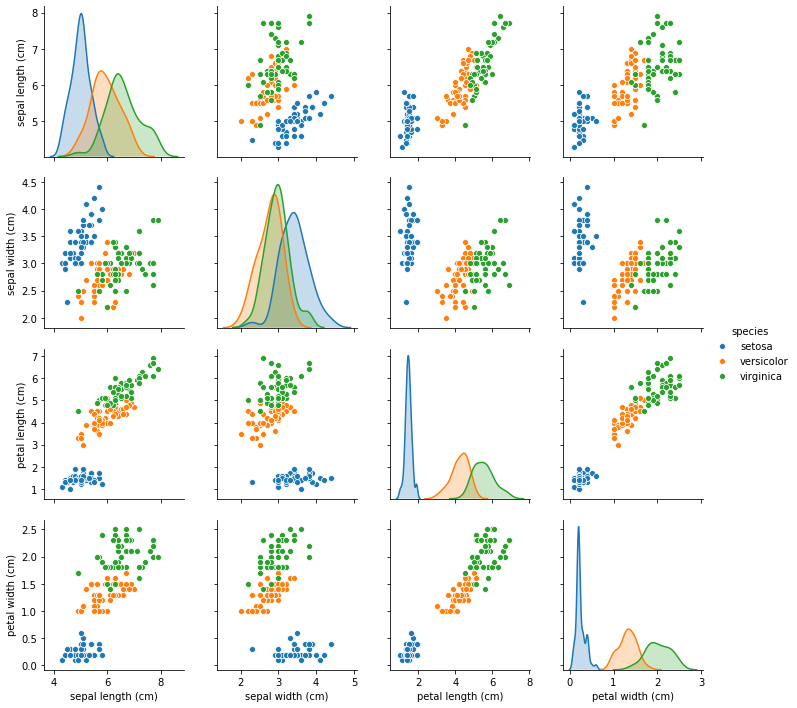

In [5]:
# Ta sekcja jest tylko na potrzeby zobrazowania zbioru danych

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

# wykresy będą tworzone przy pomocy pakietu seaborn
import seaborn as sns

# konwersja na obiekt pandas.DataFrame
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])

# funkcja która nam zamieni wartości 0, 1, 2 na pełny opis tekstowy dla gatunku
targets = map(lambda x: iris['target_names'][x], iris['target'] )

# doklejenie informacji o gatunku do reszty dataframe
iris_df['species'] = np.array(list(targets))

#print(iris_df['species'])

# wykres
sns.pairplot(iris_df, hue='species')
plt.show()

In [6]:
# zobaczmy jak naocznie wyglądają dane
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Podzielmy zbiór na cechy oraz etykiety
# Konwencja, często spotykana w dokumentacji sklearn to X dla cech oraz y dla etykiet
X = iris.data
y = iris.target

# Używamy funkcji do podzielenia zbioru na zbiór uczący i zbiór testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Tworzymy klasyfikator k-NN używając parametru 5 sąsiadów
knn = KNeighborsClassifier(n_neighbors = 5)

# Uczymy klasyfikator na zbiorze - zaskoczenie - uczącym
knn.fit(X_train, y_train)

# Przewidujemy wartości dla zbioru testowego
y_pred = knn.predict(X_test)

# Sprawdzamy kilka pierwszych wartości przewidzianych
print(y_pred[:5])

# Sprawdzamy dokładność klasyfikatora
print(knn.score(X_test, y_test))

[0 0 1 1 0]
0.9555555555555556


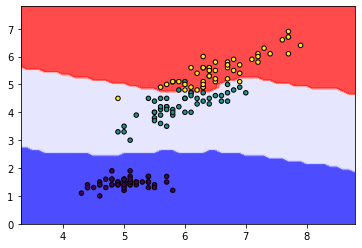

In [8]:
# Na przykładzie dwóch cech sprawdźmy jakie są granice decyzyjne

%matplotlib inline

# Tworzymy płaszczyznę wszystkich możliwych wartości dla cechy 0 oraz 2, z krokiem 0.1
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Uczymy klasyfikator na tylko dwóch wybranych cechach
knn.fit(X_train[:, [0, 2]], y_train)

# Przewidujemy każdy punkt na płaszczyźnie
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Tworzymy contourplot
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.bwr)
plt.scatter(X[:, 0], X[:, 2], c=y, s=20, edgecolor='k')
plt.show()

dokladnosc dla: 1 to 0.9333333333333333
dokladnosc dla: 2 to 0.9555555555555556
dokladnosc dla: 3 to 0.9333333333333333
dokladnosc dla: 5 to 0.9555555555555556
dokladnosc dla: 8 to 0.9555555555555556
dokladnosc dla: 13 to 0.9777777777777777
dokladnosc dla: 21 to 0.9777777777777777
dokladnosc dla: 34 to 0.9333333333333333


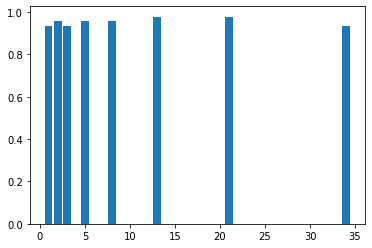

In [15]:
# Zadanie 2:
# Stwórz listę kilku wybranych przez siebie wartości dla parametru n_neighbors
# W pętli 'for' użyj kolejnych wartości parametru do stworzenia klasyfikatora
# Następnie naucz go na danych uczących
# Zapisz wynik scoringu na danych testowych do osobnej listy

lista_n = [1,2,3,5,8,13,21,34]
dokladnosci = []

for n_neighb in lista_n:
    
    knn = KNeighborsClassifier(n_neighbors = n_neighb)
    knn.fit(X_train, y_train)
    dokladnosc = knn.score(X_test, y_test)
    dokladnosci.append(dokladnosc)
    print('dokladnosc dla:',n_neighb,"to",dokladnosc)

# Wyświetl wykres zależności między liczbą sąsiadów a dokładnością.
%matplotlib inline
plt.bar(lista_n, dokladnosci)
plt.show()

In [ ]:
# Część 2

Elementy zbioru:  ['data', 'target', 'target_names', 'images', 'DESCR']
Typ pierwszego elementu z 'images':  <class 'numpy.ndarray'>
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
Pierwsza cyfra w zbiorze to:  0


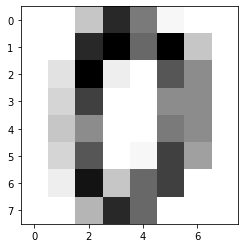

In [20]:
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

# Wczytaj przykładowy zbiór danych - cyfry odręczne z MNIST
digits = datasets.load_digits()

# Zobaczmy jakie dane mamy w zbiorze
print('Elementy zbioru: ', list(digits.keys()))

# Każda cyfra to po prostu macierz 8x8
print('Typ pierwszego elementu z \'images\': ', type(digits['images'][0]))
print(digits['images'][0])

# Cyfry mają swoje etykiety
print('Pierwsza cyfra w zbiorze to: ', digits['target'][0])

# Możemy też wyświetlić dwuwymiarową macierz jako obrazek, za pomocą imshow
plt.imshow(digits.images[0], cmap=plt.cm.Greys)
plt.show()

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Podzielmy zbiór na cechy oraz etykiety
# Trzymamy się konwencji, X dla cech oraz y dla etykiet
X = digits.data
y = digits.target

# Używamy funkcji do podzielenia zbioru na zbiór uczący i zbiór testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Tworzymy klasyfikator k-NN używając parametru 5 sąsiadów
knn = KNeighborsClassifier(n_neighbors = 5)

# Uczymy klasyfikator na zbiorze uczącym
knn.fit(X_train, y_train)

# Sprawdzamy dokładność klasyfikatora
print(knn.score(X_test, y_test))

0.9796296296296296


In [22]:
# Sprawdźmy coś więcej niż dokładność
# na początek zapiszmy wyniki predykcji

y_pred = knn.predict(X_test)

# Sprawdźmy wyniki klasyfikacji
print(y_pred)

[7 1 7 7 9 7 3 3 6 2 4 8 8 2 8 4 3 9 2 5 1 0 6 6 0 7 4 2 2 6 1 2 6 3 4 1 4
 3 0 2 3 6 2 8 6 5 9 4 2 8 4 8 2 3 2 2 9 6 9 1 8 7 0 3 6 2 3 5 5 1 8 7 5 6
 1 5 8 8 7 4 5 1 6 5 5 3 2 8 9 1 4 4 7 9 9 7 4 6 3 6 8 0 0 9 7 9 1 6 0 7 5
 7 1 4 6 6 8 4 6 5 1 0 1 6 5 7 9 7 7 6 3 7 7 1 9 9 6 0 8 2 1 8 1 0 2 1 5 9
 2 2 4 7 1 9 9 9 5 1 0 6 2 7 3 2 6 6 7 8 1 7 4 1 3 7 4 4 0 6 4 3 4 0 7 4 5
 0 5 7 3 6 4 2 3 0 9 2 9 3 9 4 1 4 4 9 4 9 2 4 7 6 0 5 1 8 5 3 3 2 3 8 6 6
 5 7 7 8 0 0 6 5 8 6 4 9 4 0 3 7 8 6 0 8 9 1 3 3 5 6 1 1 6 3 9 5 0 2 6 6 2
 1 6 1 8 7 8 5 1 2 5 4 7 6 7 3 6 0 1 8 5 6 2 2 5 0 6 6 0 4 8 0 5 6 2 8 7 7
 1 7 3 1 0 2 8 6 0 6 0 4 8 4 4 5 1 4 6 9 9 3 0 8 0 3 1 6 9 4 1 1 5 7 1 2 7
 4 8 2 5 6 5 5 9 0 8 0 1 3 5 1 3 3 4 8 3 7 3 4 5 0 6 8 0 7 5 3 2 2 5 6 4 4
 4 3 6 6 1 5 5 7 1 7 1 5 8 7 4 1 3 8 2 2 8 7 6 0 1 0 2 5 2 7 0 0 0 8 5 9 8
 5 9 1 7 5 1 5 1 5 6 8 9 6 5 4 1 4 3 0 1 5 0 6 8 5 7 5 7 4 3 0 2 7 8 0 7 1
 6 3 6 6 7 0 9 2 9 7 9 7 1 8 2 9 7 1 5 8 9 1 2 6 3 3 4 4 0 2 2 2 4 5 5 2 0
 6 0 9 3 2 3 2 9 8 4 0 1 

In [62]:
from sklearn.metrics import classification_report, confusion_matrix

# Jak bardzo wyniki różnią się od prawdziwych wartości?

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20  0  3]
 [ 2 12  7]
 [ 0  3  7]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89        23
           1       0.80      0.57      0.67        21
           2       0.41      0.70      0.52        10

    accuracy                           0.72        54
   macro avg       0.71      0.71      0.69        54
weighted avg       0.77      0.72      0.73        54



In [ ]:
# Opisy różnych metryk znajdziesz tutaj:
# https://en.wikipedia.org/wiki/Confusion_matrix
# Od biedy:
# https://pl.wikipedia.org/wiki/Tablica_pomyłek

In [24]:
# Klasyfikatory potrafią określać również prawdopodobieństwo przynależności do konkretnej klasy

y_pred_proba = knn.predict_proba(X_test)

# Sprawdźmy wyniki klasyfikacji dla kilku pierwszych wartości
print(y_pred_proba[:10])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
# Część 3

Attrs: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
target_names: ['class_0' 'class_1' 'class_2']
feature_names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


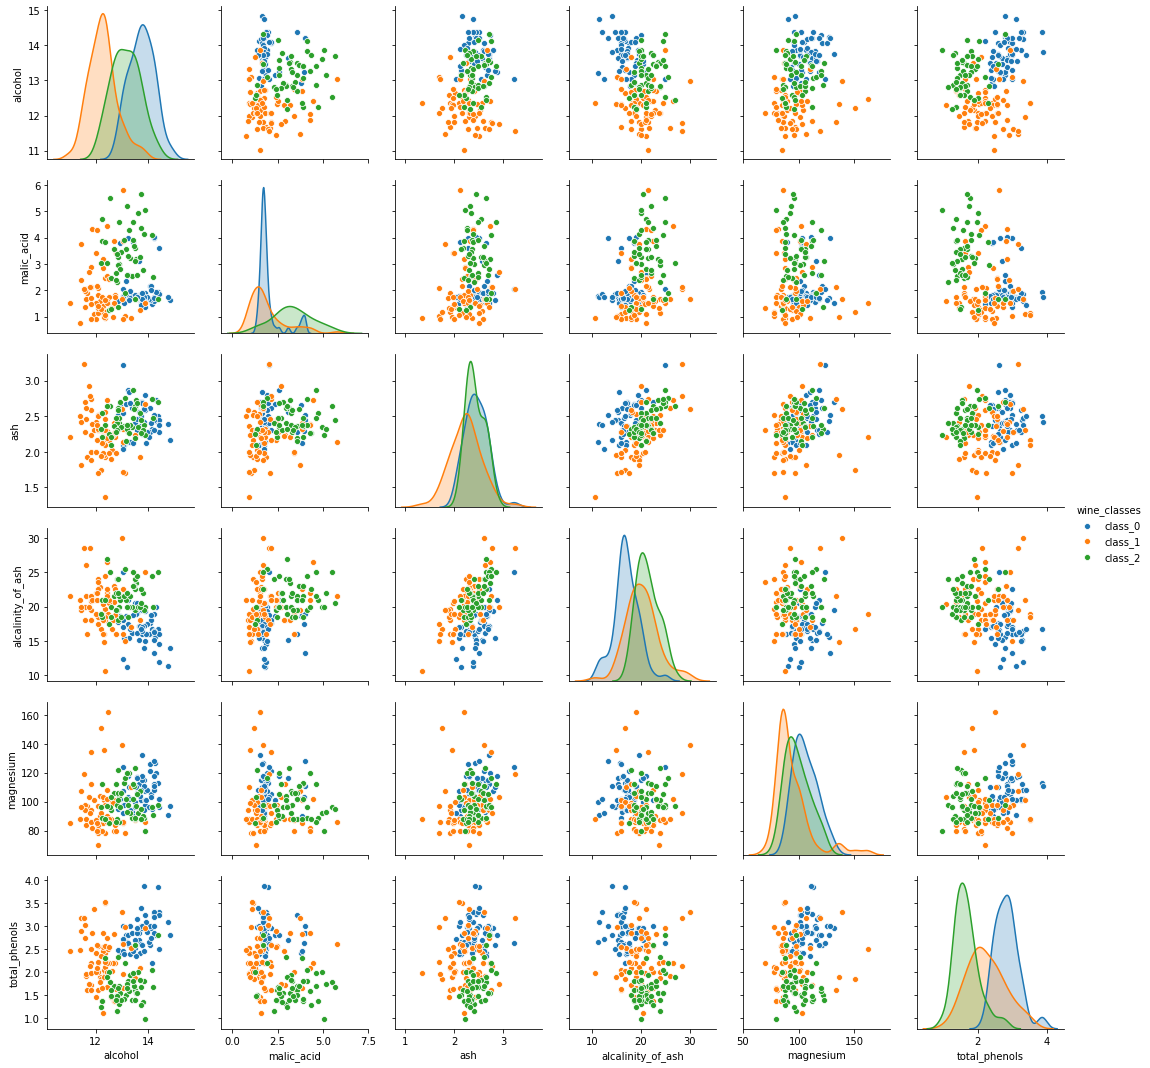

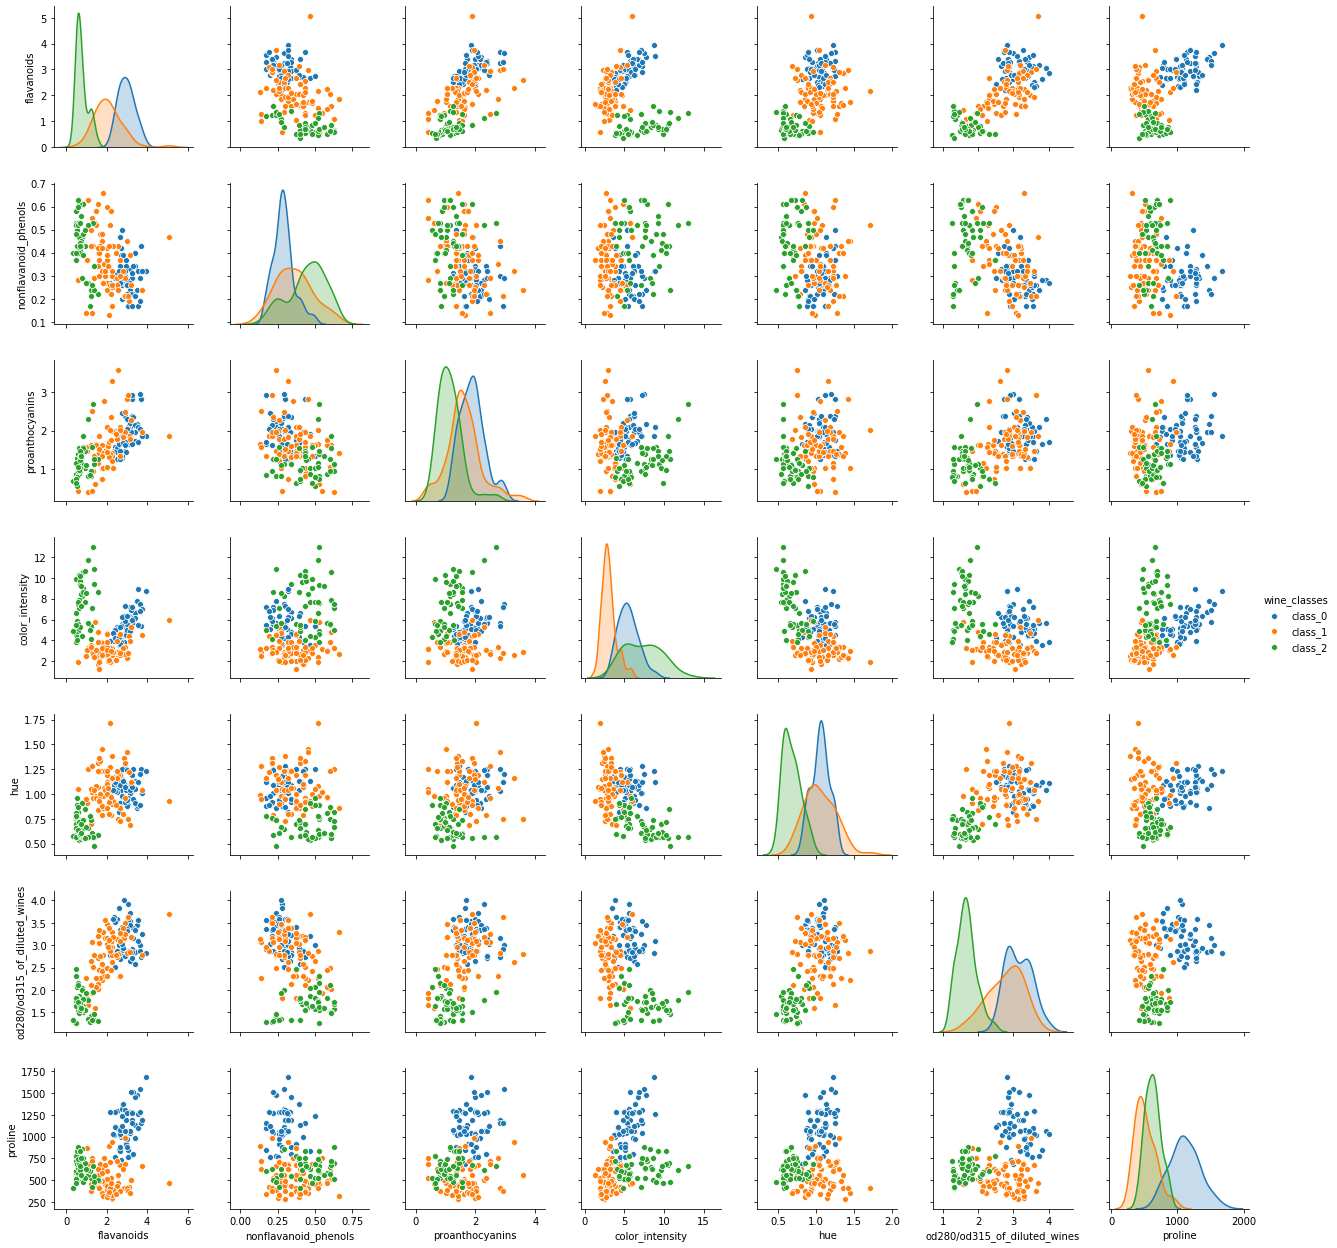

[[16  1  0]
 [ 2 12  8]
 [ 5  4  6]]
              precision    recall  f1-score   support

           0       0.70      0.94      0.80        17
           1       0.71      0.55      0.62        22
           2       0.43      0.40      0.41        15

    accuracy                           0.63        54
   macro avg       0.61      0.63      0.61        54
weighted avg       0.63      0.63      0.62        54



In [63]:
# Zadanie 3:
# wczytaj dane o winach za pomocą funkcji poniżej
from sklearn.datasets import load_wine
wines = load_wine()
# Zbadaj zbiór danych. Stwórz wykresy obrazujące ten zbiór danych.
print('Attrs:',wines.keys())
print('target_names:',wines['target_names'])
#print('DESCR:',wines['DESCR'])
print('feature_names:',wines['feature_names'])

wines_df = pd.DataFrame(wines['data'], columns=wines['feature_names'])
targets = map(lambda x: wines['target_names'][x], wines['target'] )
wines_df['wine_classes'] = np.array(list(targets))
#print(wines_df)
#podzielilem na 2 oddzielne, zeby nie robic jednego nieczytelnego (oczywiscie zdaje sobie sprawe, ze 2 oddzielne != 1 caly)
df_1 = wines_df.loc[:, ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols','wine_classes'] ]
df_2 = wines_df.loc[:,'flavanoids':'wine_classes']
sns.pairplot(df_1, hue='wine_classes')
sns.pairplot(df_2, hue='wine_classes')
plt.show()

# Podziel zbiór danych na uczący i testowy.
X = wines.data
y = wines.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
# Wytrenuj klasyfikator kNN
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
# Dokonaj predykcji na zbiorze testowym
y_pred = knn.predict(X_test)
# Wypisz raport z uczenia: confusion_matrix oraz classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [109]:
# Zadanie bonus:
# Wczytaj dane za pomocą funkcji fetch_openml
from sklearn.datasets import fetch_openml

# Funkcja przyjmuje jako parametr nazwę zbioru danych z https://www.openml.org/search?type=data
# Proponuję zbiór 'bank-marketing', ale możesz wybrać dowolny inny z kategorii "klasyfikacja"
# Reszta: jak w zadaniu 3.

marketing_data = fetch_openml(data_id='1558')
# print('Attrs:',marketing_data.keys())
# print('data:',marketing_data['data'])
# print('feature_names:',marketing_data['feature_names'])
# print('details:',marketing_data['details'])
# print('categories:',marketing_data['categories'])
#print('url:',marketing_data['url'])
marketing_data['real_feature_names'] = ['age', 'job', 'marital', 'education', 'default', 
                                        'balance', 'housing', 'loan', 'contact',
                                        'day', 'month', 'duration', 'campaign', 
                                        'pdays', 'previous', 'poutcome']
#dla ładniejszej prezentacji danych sformatuje sobie zbior 'data' tak, aby uwzglednial kategorie
marketing_data['data_with_cat'] = []
for data in marketing_data['data']:
    new_row = {}
    for index,elem in enumerate(data):
        name = marketing_data['feature_names'][index]
        real_name = marketing_data['real_feature_names'][index]
        if (name in marketing_data['categories'] ):
            category = marketing_data['categories'][name]
            new_row[real_name] = category[int(elem)]
        else:
            new_row[real_name] = elem
    marketing_data['data_with_cat'].append(new_row)

marketing_df = pd.DataFrame(marketing_data['data_with_cat'], columns=marketing_data['real_feature_names'])
print(marketing_df)

#zakomentowane bo wykres duzy i nieczytelny
#marketing_df = pd.DataFrame(marketing_data['data'], columns=marketing_data['real_feature_names'])
#sns.pairplot(marketing_df)
#plt.show()

# Podziel zbiór danych na uczący i testowy.
X = marketing_data.data
y = marketing_data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
# Wytrenuj klasyfikator kNN
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
# Dokonaj predykcji na zbiorze testowym
y_pred = knn.predict(X_test)
# Wypisz raport z uczenia: confusion_matrix oraz classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


       age            job  marital  education default  balance housing loan  \
0     30.0     unemployed  married    primary      no   1787.0      no   no   
1     33.0       services  married  secondary      no   4789.0     yes  yes   
2     35.0     management   single   tertiary      no   1350.0     yes   no   
3     30.0     management  married   tertiary      no   1476.0     yes  yes   
4     59.0    blue-collar  married  secondary      no      0.0     yes   no   
...    ...            ...      ...        ...     ...      ...     ...  ...   
4516  33.0       services  married  secondary      no   -333.0     yes   no   
4517  57.0  self-employed  married   tertiary     yes  -3313.0     yes  yes   
4518  57.0     technician  married  secondary      no    295.0      no   no   
4519  28.0    blue-collar  married  secondary      no   1137.0      no   no   
4520  44.0   entrepreneur   single   tertiary      no   1136.0     yes  yes   

       contact   day month  duration  campaign  pda